# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.17.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

c:\Users\KrishnaDas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

c:\Users\KrishnaDas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5332 - loss: 0.7029

c:\Users\KrishnaDas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.5333 - loss: 0.7028 - val_accuracy: 0.6855 - val_loss: 0.6205
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.6701 - loss: 0.6142 - val_accuracy: 0.7235 - val_loss: 0.5666
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 72ms/step - accuracy: 0.6922 - loss: 0.5861 - val_accuracy: 0.7070 - val_loss: 0.5674
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.7167 - loss: 0.5504 - val_accuracy: 0.7245 - val_loss: 0.5632
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.7436 - loss: 0.5251 - val_accuracy: 0.7555 - val_loss: 0.5166
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 68ms/step - accuracy: 0.7551 - loss: 0.5063 - val_accuracy: 0.7690 - val_loss: 0.4840
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 69ms/step - accuracy: 0.7663 - loss: 0.4844 - val_accuracy: 0.7365 - val_loss: 0.5340
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.7810 - loss: 0.4674 - val_accurac

## Part 4 - Making a single prediction

In [14]:
# import numpy as np
# from tensorflow.keras.preprocessing import image
# test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)
# result = cnn.predict(test_image)
# training_set.class_indices
# if result[0][0] == 1:
#   prediction = 'dog'
# else:
#   prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


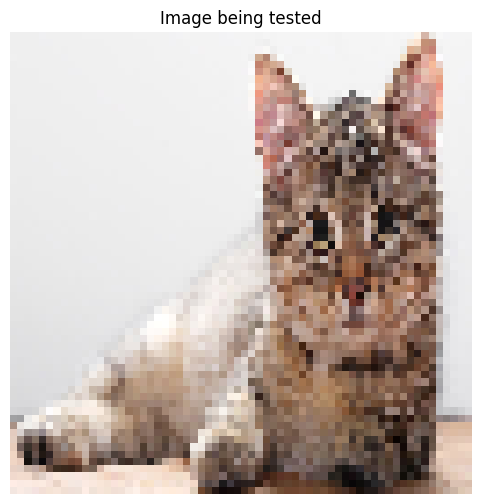

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: This is a cat


In [18]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = 'dataset/single_prediction/cat_or_dog_2.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(test_image)
plt.title('Image being tested')
plt.axis('off')
plt.show()

# Convert image for prediction
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Make prediction
result = cnn.predict(test_image_array)
training_set.class_indices

# Print result
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(f'Prediction: This is a {prediction}')

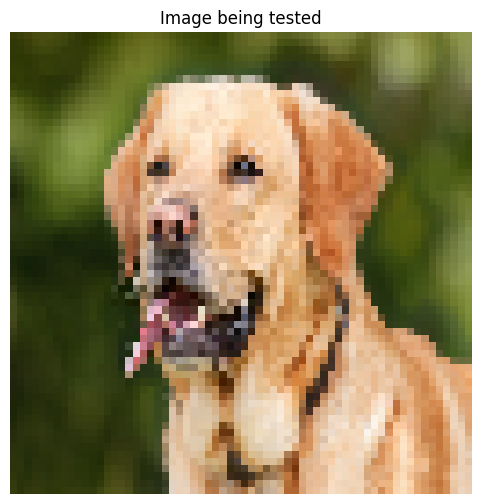

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
Prediction: This is a dog


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = 'dataset/single_prediction/cat_or_dog_1.jpg'
test_image = image.load_img(image_path, target_size=(64, 64))

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(test_image)
plt.title('Image being tested')
plt.axis('off')
plt.show()

# Convert image for prediction
test_image_array = image.img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

# Make prediction
result = cnn.predict(test_image_array)
training_set.class_indices

# Print result
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(f'Prediction: This is a {prediction}')